In [4]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

ESTRUTURA PROPOSTA:
1.Introdução

2.Business Understanding

3.Data Understanding
 3.1. Descrição
 3.2. EDA
 3.3. Correlações
 3.4. Qualidade dos dados

4.Data Preparation
 4.1. Limpeza
 4.2. Transformações
 4.3. Feature Engineering

5.Modeling
 5.1. Clustering
 5.2. Modelos de previsão
 5.3. Normalização

6.Evaluation

7.Conclusion

8.Referências

 # 3. Data Understanding
 
O dataset utilizado corresponde ao registo contínuo de consumos energéticos de vários edifícios municipais da Maia, recolhidos através de sistemas de telemetria. As medições são efetuadas em intervalos regulares de 15 minutos, permitindo caracterizar com grande detalhe os padrões de utilização energética ao longo do tempo.
 ## 3.1 Descrição do Dataset
Cada registo do Dataset, incluí:
 - Código do local (CPE);
 - Timestamp da medição (tstamp);
 - DadosDeConsumo (kW/h);
 - Potência Ativa (kW/h);
 - Potência Reativa Indutiva (VAR);
 - Potência Reativa Capacitiva (VAR).



In [5]:


df = pl.read_csv(
    "consumo15m_11_2025.csv",
    null_values="NULL"
)
print(df.head())

print("tipo de dados de cada coluna "+str(df.dtypes))


shape: (5, 6)
┌────────────────────────┬────────────┬────────────────┬───────────┬───────────────┬───────────────┐
│ CPE                    ┆ tstamp     ┆ DadosdeConsumo ┆ PotActiva ┆ PotReactIndut ┆ PotReactCapac │
│ ---                    ┆ ---        ┆ ---            ┆ ---       ┆ ---           ┆ ---           │
│ str                    ┆ str        ┆ str            ┆ f64       ┆ str           ┆ str           │
╞════════════════════════╪════════════╪════════════════╪═══════════╪═══════════════╪═══════════════╡
│ PT0002000089069203YG   ┆ 2022-12-31 ┆ null           ┆ 0.296     ┆ null          ┆ null          │
│                        ┆ 00:15:00   ┆                ┆           ┆               ┆               │
│ PT0002000089069203YG   ┆ 2022-12-31 ┆ null           ┆ 0.292     ┆ null          ┆ null          │
│                        ┆ 00:30:00   ┆                ┆           ┆               ┆               │
│ PT0002000089069203YG   ┆ 2022-12-31 ┆ null           ┆ 0.284     ┆ null    


# 3.2 Limpeza Inicial e Conversão de Tipos
 Antes de proceder à análise, é essencial garantir:
 - conversão do timestamp para formato datetime;
 - conversão das colunas numéricas para float;
 - eliminação/tratamento dos valores "NULL".
 
Estas etapas são fundamentais, pois garantem a consistência do dataset e permitem realizar operações estatísticas e temporais de forma correta. Após esta limpeza, os dados ficam prontos para uma exploração detalhada e fiável.

In [ ]:
df = df.with_columns(
    pl.col("tstamp").str.to_datetime("%Y-%m-%d %H:%M:%S")
)


df = df.with_columns([
    pl.col("DadosdeConsumo").cast(pl.Float64),
    pl.col("PotReactIndut").cast(pl.Float64),
    pl.col("PotReactCapac").cast(pl.Float64),
])



In [7]:
df.dtypes

[String,
 Datetime(time_unit='us', time_zone=None),
 Float64,
 Float64,
 Float64,
 Float64]

# 3.3 Análise Descritiva e Visualização

Nesta fase, são calculadas as principais métricas estatísticas, como média, desvio padrão, valores mínimos e máximos. Esta análise, complementada por histogramas, permite uma compreensão inicial da distribuição e da escala das variáveis, sendo fundamental para detetar anomalias, como outliers ou valores inesperados.

In [8]:
df.describe()

statistic,CPE,tstamp,DadosdeConsumo,PotActiva,PotReactIndut,PotReactCapac
str,str,str,f64,f64,f64,f64
"""count""","""5940182""","""5940182""",0.0,5.940182e6,3.66871e6,3.66871e6
"""null_count""","""0""","""0""",5.940182e6,0.0,2.271472e6,2.271472e6
"""mean""",null,"""2024-04-15 22:32:26.636113""",null,8.093966,1.715323,0.65256
"""std""",null,null,null,23.018327,3.38557,1.662369
"""min""","""PT0002000032936306KX""","""2022-12-31 00:15:00""",null,0.0,0.0,0.0
"""25%""",null,"""2023-09-28 05:00:00""",null,0.12,0.0,0.0
"""50%""",null,"""2024-05-15 14:00:00""",null,2.0,0.0,0.0
"""75%""",null,"""2024-11-08 01:00:00""",null,7.0,2.0,1.0
"""max""","""PT0002000201936109ME""","""2025-05-01 00:00:00""",null,574.0,177.0,124.0


In [9]:
df.select(pl.col("CPE").n_unique())

CPE
u32
91


O conjunto de dados contém 91 CPEs distintos.

## Análise de Histogramas


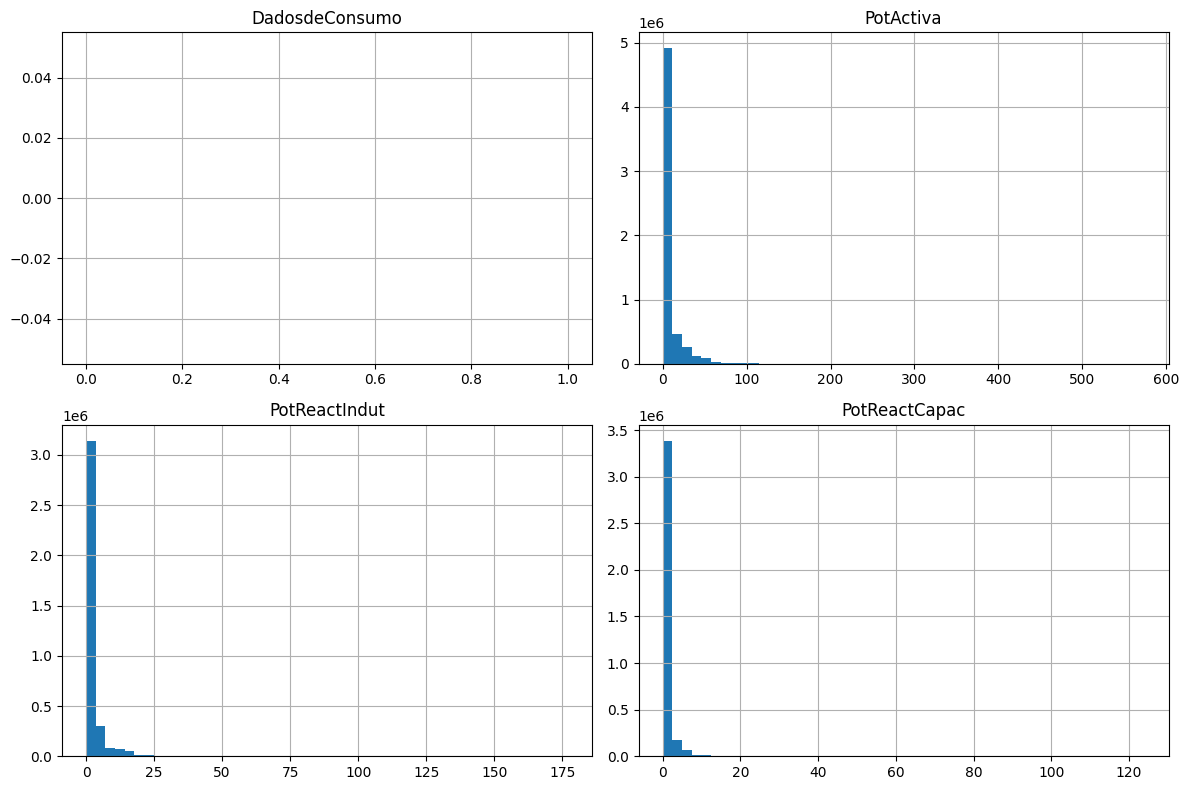

In [10]:
histo = df.select([
    "DadosdeConsumo",
    "PotActiva",
    "PotReactIndut",
    "PotReactCapac"
]).to_pandas()

histo.hist(bins=50, figsize=(12,8))
plt.tight_layout()
plt.show()



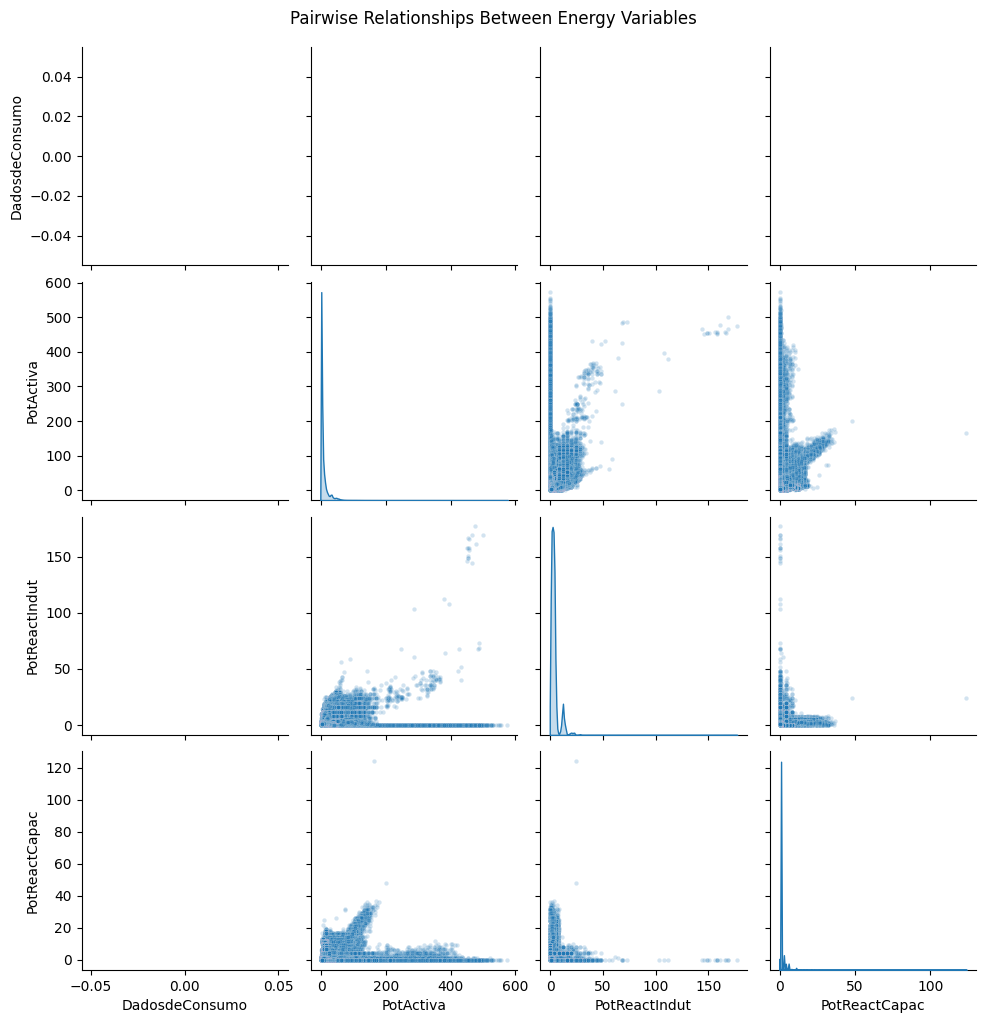

In [ ]:
sns.pairplot(
    histo,
    diag_kind="kde",
    plot_kws={"alpha": 0.2, "s": 10} 
)
plt.suptitle("Relações entre as variaveis de energia", y=1.02)
plt.show()